In [7]:
import pandas as pd

# Read the CSV file
file_path = 'merged_climate_unemployment.csv' 
data = pd.read_csv(file_path)

# Select relevant columns
columns_to_select = ['STATE', 'PC1', 'PC2', 'PC3', 'UnemploymentRate']
selected_data = data[columns_to_select].copy()  # Create a copy to avoid the warning

# Calculate the average of PC1, PC2, and PC3 for each row
selected_data.loc[:, 'PC_avg'] = selected_data[['PC1', 'PC2', 'PC3']].mean(axis=1)

# Select columns including the new average column
columns_to_group = ['STATE', 'PC_avg', 'UnemploymentRate']

# Group by 'STATE' and aggregate
aggregated_data = selected_data[columns_to_group].groupby('STATE').mean()

# Display the aggregated DataFrame
print(aggregated_data)

                  PC_avg  UnemploymentRate
STATE                                     
Alabama        -0.130473          6.035345
Alaska         -1.365508          7.036782
Arizona         1.764676          5.957184
Arkansas        0.094528          5.554598
California      1.480892          7.218103
Colorado        0.687393          4.881609
Connecticut    -0.220408          5.456897
Delaware       -0.169661          4.929598
Florida         0.981968          5.669828
Georgia        -0.115654          5.845402
Hawaii          2.298156          4.325575
Idaho           0.349519          5.270115
Illinois       -0.363686          6.367816
Indiana        -0.553292          5.308333
Iowa           -0.062338          3.974425
Kansas          1.151937          4.650000
Kentucky       -0.492340          6.118966
Louisiana       0.611637          6.091379
Maine          -0.697691          5.378448
Maryland       -0.736186          5.075862
Massachusetts  -0.620303          5.363218
Michigan   

Mean Squared Error (MSE): 0.75
R² Score: 0.03


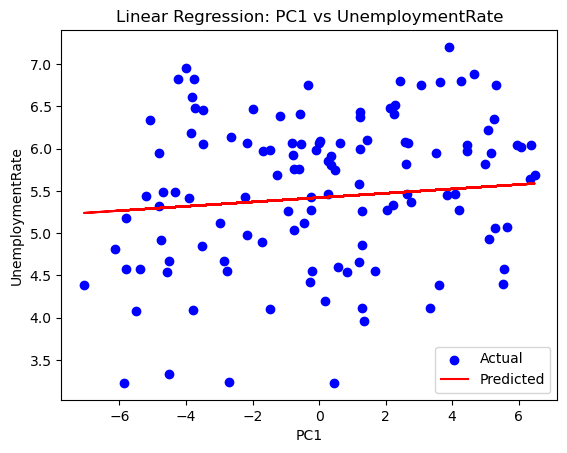

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_climate_unemployment.csv'
data = pd.read_csv(file_path)

# Prepare the data (
selected_data = data[['PC1', 'UnemploymentRate']].dropna()  # Drop missing values

# Split the data into training and testing sets
X = selected_data[['PC1']]  # Predictor
y = selected_data['UnemploymentRate']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('PC1')
plt.ylabel('UnemploymentRate')
plt.title('Linear Regression: PC1 vs UnemploymentRate')
plt.legend()
plt.show()


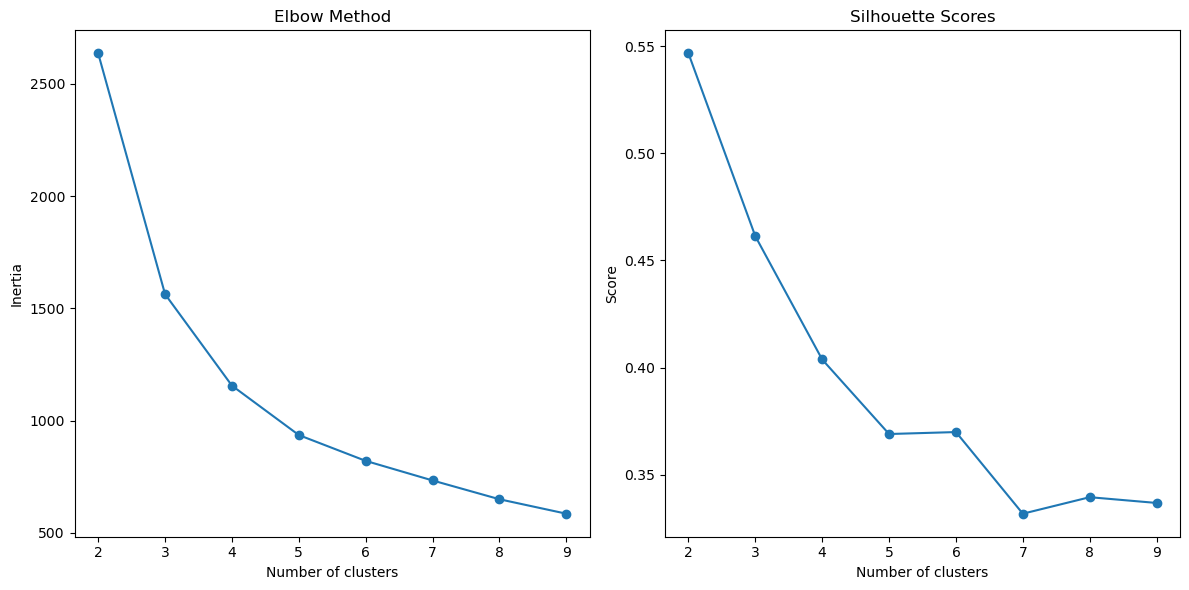

Text(0.5, 0, 'PC1')

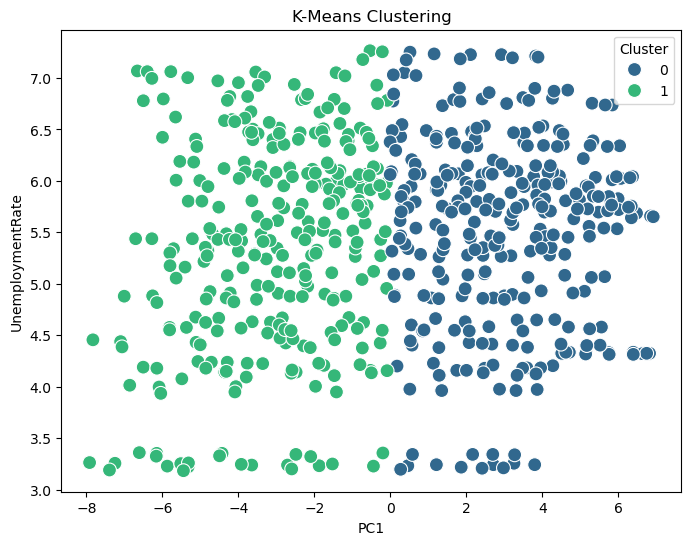

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_climate_unemployment.csv'
data = pd.read_csv(file_path)

# Select the features for clustering
clustering_data = data[['PC1', 'UnemploymentRate']].dropna()

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data, kmeans.labels_))

# Plot the elbow method and silhouette scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Fit K-Means with optimal clusters (e.g., 3 clusters based on elbow/silhouette)
optimal_clusters = 2  # Adjust based on plots
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustering_data, x='PC1', y='UnemploymentRate', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('PC1')

Mean Squared Error: 0.7455809823662903
R-squared: 0.03879985161206401


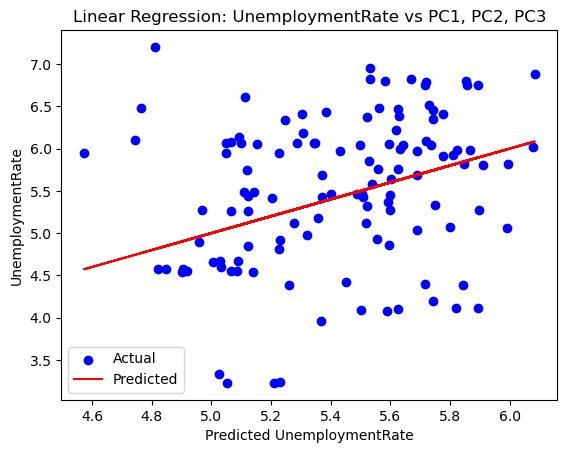

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_climate_unemployment.csv'
data = pd.read_csv(file_path)

# Prepare the data 
selected_data = data[['PC1', 'PC2', 'PC3', 'UnemploymentRate']].dropna()  # Drop missing values if any

# Split the data into training and testing sets
X = selected_data[['PC1', 'PC2', 'PC3']]  # Predictors
y = selected_data['UnemploymentRate']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.scatter(y_pred, y_test, color='blue', label='Actual')
plt.plot(y_pred, y_pred, color='red', label='Predicted')
plt.xlabel('Predicted UnemploymentRate')
plt.ylabel('UnemploymentRate')
plt.title('Linear Regression: UnemploymentRate vs PC1, PC2, PC3')
plt.legend()
plt.show()

Mean Squared Error: 0.6892584283474754
R-squared: 0.11141067265078497


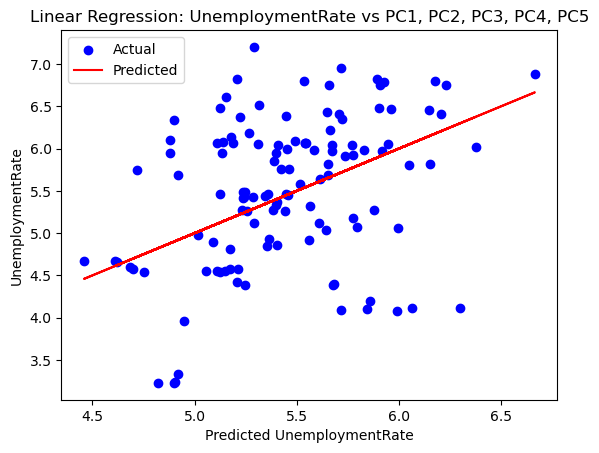

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_climate_unemployment.csv'
data = pd.read_csv(file_path)

# Prepare the data 
selected_data = data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'UnemploymentRate']].dropna()  # Drop missing values if any

# Split the data into training and testing sets
X = selected_data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]  # Predictors
y = selected_data['UnemploymentRate']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.scatter(y_pred, y_test, color='blue', label='Actual')
plt.plot(y_pred, y_pred, color='red', label='Predicted')
plt.xlabel('Predicted UnemploymentRate')
plt.ylabel('UnemploymentRate')
plt.title('Linear Regression: UnemploymentRate vs PC1, PC2, PC3, PC4, PC5')
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.76
R² Score: 0.02


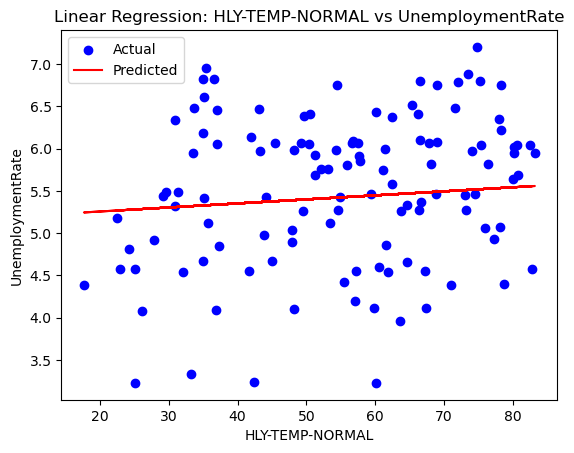

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_climate_unemployment.csv'
data = pd.read_csv(file_path)

# Prepare the data (
selected_data = data[['HLY-TEMP-NORMAL', 'UnemploymentRate']].dropna()  # Drop missing values

# Split the data into training and testing sets
X = selected_data[['HLY-TEMP-NORMAL']]  # Predictor
y = selected_data['UnemploymentRate']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('HLY-TEMP-NORMAL')
plt.ylabel('UnemploymentRate')
plt.title('Linear Regression: HLY-TEMP-NORMAL vs UnemploymentRate')
plt.legend()
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_climate_unemployment.csv'
data = pd.read_csv(file_path)

# Prepare the data 
selected_data = data[['HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL', 'UnemploymentRate']].dropna()  # Drop missing values if any

# Split the data into training and testing sets
X = selected_data[['HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']]  # Predictors
y = selected_data['UnemploymentRate']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 0.7425807438753664
R-squared: 0.04266774758967162
